# Product data Analysis

Here we have a fashion products sample data with some exciting features based on this i will analyse and try to get some insights



In [1]:
# importing all required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.DataFrame(pd.read_excel("/content/Sample Product Data.xlsx"))
print(df.shape) List item
df.head()

(2170, 21)


,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,A1R11603GBLK00011G749,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,749.0,749.0,1,0,10,0.532958,100,0,120,1,0
1,A1PU9601GTAN00008G539,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,539.0,539.0,1,0,10,0.707097,100,0,227,1,0
2,A1FB9102GPBYL00007G499,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,499.0,499.0,1,0,10,0.879106,100,0,972,1,0
3,A1FB9572GPTAN00006G499,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,499.0,499.0,1,0,10,0.879087,100,0,470,1,0
4,A1EV1420LBLK00007G110,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,329.0,329.0,1,0,10,0.368253,100,0,376,1,1


In [4]:

count=0
for i in df['Product_Name'].unique():
  count+=1
print(count)

314


over all 314 products are there in this sample data set


#Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SKU                        2170 non-null   object        
 1   Product_Name               2170 non-null   object        
 2   Date                       2170 non-null   datetime64[ns]
 3   itemRevenue                126 non-null    float64       
 4   itemQuantity               2170 non-null   int64         
 5   buyToDetailRate            2170 non-null   float64       
 6   productAddsToCart          2170 non-null   int64         
 7   cartToDetailRate           2170 non-null   float64       
 8   uniquePurchases            2170 non-null   int64         
 9   quantityAddedToCart        2170 non-null   int64         
 10  revenuePerItem             2170 non-null   float64       
 11  productRevenuePerPurchase  2170 non-null   float64       
 12  itemsP

In [9]:
df.describe()

,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
count,126.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.0,2170.000000,2170.000000,2170.000000
mean,361.769841,0.081106,0.500330,0.348848,0.498002,0.079263,0.352995,13.988172,14.228725,0.059908,4.091244,32.769585,0.504506,327.695853,0.0,501.467742,3.276959,1.597696
std,320.845032,0.371734,0.286000,0.709197,0.288224,0.364622,0.721023,65.979799,66.639082,0.245017,6.580352,46.055346,0.291945,460.553458,0.0,290.877658,4.605535,3.013554
min,77.000000,0.000000,0.001207,0.000000,0.000711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000690,100.000000,0.0,1.000000,1.000000,0.000000
25%,129.250000,0.000000,0.253793,0.000000,0.247815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.252573,100.000000,0.0,250.250000,1.000000,0.000000
50%,224.500000,0.000000,0.504801,0.000000,0.496590,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.513127,200.000000,0.0,501.000000,2.000000,1.000000
75%,539.000000,0.000000,0.741561,1.000000,0.752451,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,40.000000,0.755743,400.000000,0.0,755.000000,4.000000,2.000000
max,1518.000000,4.000000,0.999941,5.000000,0.999885,4.000000,5.000000,759.000000,759.000000,2.000000,115.000000,1010.000000,0.999592,10100.000000,0.0,1000.000000,101.000000,66.000000


Checking for missing values in each column


In [10]:
df.isnull().sum()

SKU                             0
Product_Name                    0
Date                            0
itemRevenue                  2044
itemQuantity                    0
buyToDetailRate                 0
productAddsToCart               0
cartToDetailRate                0
uniquePurchases                 0
quantityAddedToCart             0
revenuePerItem                  0
productRevenuePerPurchase       0
itemsPerPurchase                0
productDetailViews              0
sessions                        0
bounceRate                      0
pageViews                       0
pageviewsPerSession             0
sessionDuration                 0
users                           0
newUsers                        0
dtype: int64

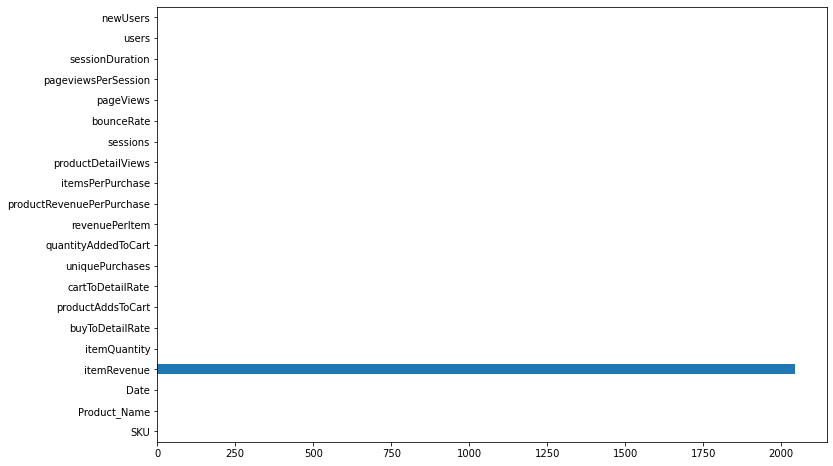

In [11]:
plt.figure(figsize=(12,8))
sum=df.isnull().sum()
sum.plot(kind='barh')

From the above two cells its clear that only itemRevenue column has null values And we can delete that column or we can ignore


#EDA

checking the distribution of  how many people buy the product after visiting the page and add the product to their cart 



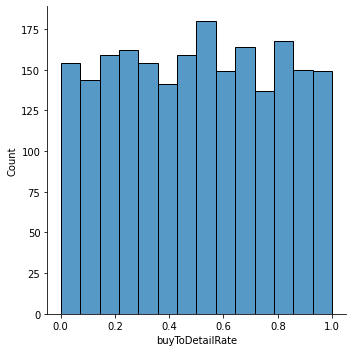

In [12]:
sns.displot(df['buyToDetailRate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


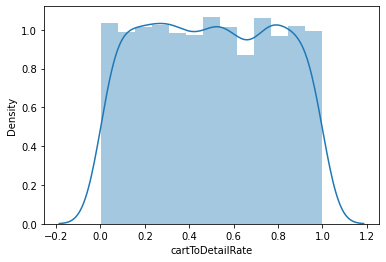

In [13]:
sns.distplot(df['cartToDetailRate'])

from the above two graph what we can understand is both ratings have an average of 50%

In [14]:
product_revenue_group=df.groupby(by=['Product_Name','buyToDetailRate'],as_index=False)['itemQuantity'].count()
product_revenue_group.head()

,Product_Name,buyToDetailRate,itemQuantity
0,Men Black-Red Sport Shoes,0.373057,1
1,Men Black-Red Sport Shoes,0.651730,1
2,Men Black-Red Sport Shoes,0.744324,1
3,Men Black-Red Sport Shoes,0.828178,1
4,Men's Black Sandals,0.456952,1


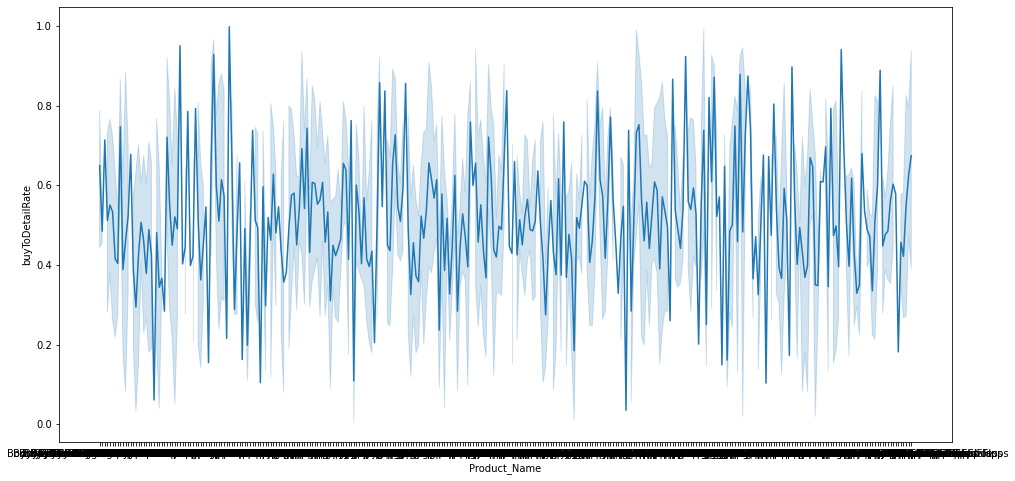

In [15]:
#plt.plot(x='Product_Name',y='buyToDetailRate')
plt.figure(figsize=(16,8))
sns.lineplot(x=product_revenue_group['Product_Name'],y=product_revenue_group['buyToDetailRate'])

In [16]:
by_rate=df['buyToDetailRate']
#by_rate.sort_values(ascending=False)
more=0
less=0
for i in by_rate:
  if i > 0.80 :
    more+=1
  if i <0.30:
    less+=1  

print(more)  
print(less) 

435
644


435 product has more than 80% buying rate and 644 product has less than 30% buying rate

**** top 15 product in the data set***
Men's Black  Flip-Flops          126
Men's Grey  Sandals               66
Men's Brown  Flip-Flops           57
Men's Brown  Formal Belt          43
Women's Blue  Flip-Flops          42
Men's Blue  Flip-Flops            34
Women's Pink  Flip-Flops          31
Men's Green  Sandals              31
Men's  Black Flip Flops           30
Women's Red  Flip-Flops           29
Men's Black & Red  Flip-Flops     28
Men's  Brown Flip Flops           28
Men's  Blue Flip Flops            26
Men's Black  Sandals              24
Kids Black P-Toes Flip-Flops      23
Name: Product_Name, dtype: int64


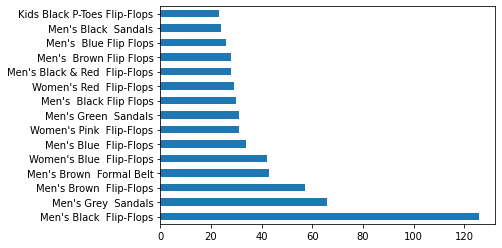

In [17]:
# checking for most brought product
print('**** top 15 product in the data set***')
high_buying_rate_products=df.Product_Name.value_counts()
print(high_buying_rate_products.head(15))
high_buying_rate_products.head(15).plot(kind='barh')


From the above graph we can see that 'men's black flip flop' has twise demand than the 2nd most appread product 'men's grey sandals'

In [18]:
df['sessionDuration'].sum()/len(df['sessionDuration'])

501.46774193548384

An average of 501.46 duration of session time a customer spend on the pages

<BarContainer object of 2170 artists>

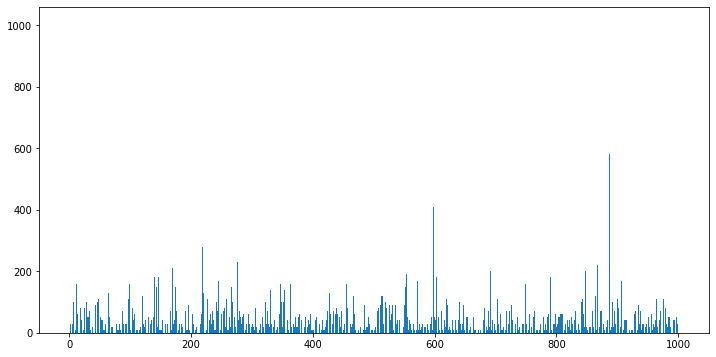

In [26]:
plt.figure(figsize=(12,6))
plt.bar(df['sessionDuration'],df['sessions'])

looking for how many session customer visited the site and it's duration . everything looks normal except some exception of high duration time

### Insights that i got from data


1.  This product details contains 314 unique product  
2.  Except Item revenue column all other features are clean and they don't have any null values but this column has more than 2000 null values , we can delete this coluns or ignore
3.  Both buy rate and add to cart rate are Contineous Uniformly distributed and have an average of 50% so everything looks good
4.  even the bounce rate has an average of 50% some customers spend a lot of time in the page but didn't make any order
5.  435 product has more than 80% buying rate and 644 product has less than 30% buying rate
6.  An average of 501.46 duration of session time a customer spend on the pages and customers who spent a lot of time in page by reading a details either they brought or added the item to cart
7.  every product has a average regular user of 3 and new user of 1.5

